In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color
# convolution
from scipy.signal import convolve2d


import pandas as pd


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

### 5-2

In [2]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[2,4,8],[3,5,7]])

def Frobenius(A,B):
    re = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            re += (A[i][j]-B[i][j])**2 #원소 차의 제곱합
    return np.sqrt(re)

Frobenius(A,B)

N = 4

C = np.random.rand(N,N)
D = np.random.rand(N,N)
s = 1

f = Frobenius(C*s,D*s)

count = 0
while f >= 1:
    s *= 0.9
    count += 1
    f = Frobenius(C*s,D*s)

print(count, s)

4 0.6561000000000001


### 5-4

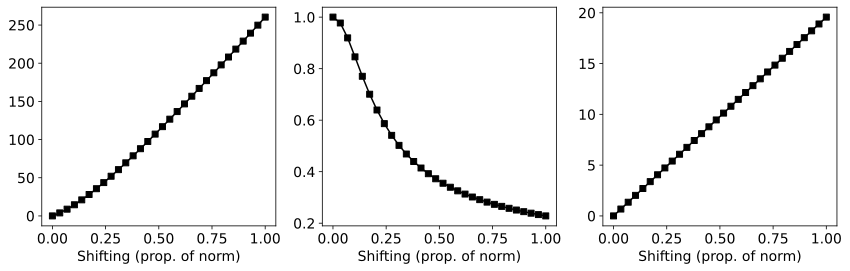

In [3]:
N = 10
M = np.random.rand(N,N)
#frobenius = Frobenius(M,M)
normM = np.linalg.norm(M,'fro')

shifting = np.linspace(0,1,30)
shiftingResults = np.zeros( (len(shifting),3) )

for i in range(len(shifting)):
    M_var = M+normM*shifting[i]*np.eye(N) #여기서 shifting[i]가 아닌 i를 작성해서 처음에 올바른 결과가 나오지 않았음.
    shiftingResults[i,0] = 100 * (np.linalg.norm(M_var,'fro')-normM)/normM #변화율..!
    shiftingResults[i,1] = np.corrcoef(M.flatten(), M_var.flatten())[0,1]
    shiftingResults[i,2] = Frobenius(M,M_var)

#plot
_,axs = plt.subplots(1,3,figsize=(12,4))

for i in range(3):

  # plot the results
  axs[i].plot(shifting,shiftingResults[:,i],'ks-')
  axs[i].set_xlabel('Shifting (prop. of norm)')

plt.tight_layout()
plt.show()    

### 정답

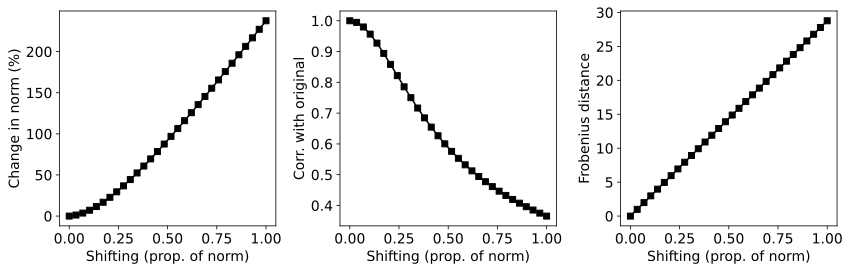

In [4]:
# size of the matrix
N = 10

shifting = np.linspace(0,1,30)

# original matrix
A = np.random.randn(N,N)
normA = np.linalg.norm(A,'fro')

# initialize results matrices
shiftingResults = np.zeros( (len(shifting),3) )
resultsNames = [ 'Change in norm (%)','Corr. with original','Frobenius distance' ]



for si in range(len(shifting)):

  # shift the matrix
  As = A + shifting[si]*normA*np.eye(N)

  # get the new norm and transform to %-change
  normShift = np.linalg.norm(As,'fro')
  shiftingResults[si,0] = 100 * (normShift-normA)/normA

  # compute correlation
  shiftingResults[si,1] = np.corrcoef(A.flatten(),As.flatten())[0,1]

  # Frobenius distance
  shiftingResults[si,2] = Frobenius(A,As)




## plotting!
_,axs = plt.subplots(1,3,figsize=(12,4))

for i in range(3):

  # plot the results
  axs[i].plot(shifting,shiftingResults[:,i],'ks-')
  axs[i].set_xlabel('Shifting (prop. of norm)')
  axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
plt.show()

### 5-8

In [5]:
N = np.random.randint(0,100)
A = np.random.randn(N,N)

print(A.ndim)
print(A.T.ndim)
print((A.T@A).ndim)
print((A@A.T).ndim)

2
2
2
2


### 5-9

In [6]:
# function to run algorithm

def is_V_inColA(A,v):

  # check sizes
  if A.shape[0]!=v.shape[0]: #행의 수가 같은지 확인부터 해준다.
    raise Exception('Size mismatch! A and v must have the same column dimensionality!.')

  # 계수 계산
  rankA  = np.linalg.matrix_rank(A)
  rankAv = np.linalg.matrix_rank( np.hstack((A,v)) )

  # function outputs TRUE if v \in C(A)
  return rankA==rankAv


A = np.random.randn(4,3) # **가우시안 표준 정규분포에서 난수 matrix array 생성하는 것
v = np.random.randn(4,1)

# test!
is_V_inColA(A,v)

False

In [7]:
A = np.random.randn(4,4) # 계수-4 행렬 사용

is_V_inColA(A,v)

True

### 6-1

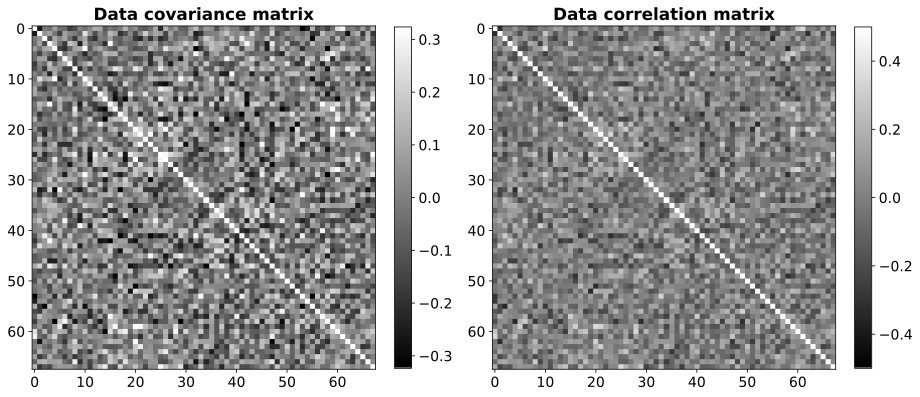

In [8]:
N = np.random.randint(0,100)
data = np.random.randn(N,N)

covMat = data.T@data #데이터 행렬의 전치와 데이터 행렬의 곱
covMat /= data.shape[0]-1 #N-1로 나누기(=공분산행렬)

variances = np.diag(covMat) #대각원소들은 분산이다.
standard_devs = np.sqrt( variances ) #표준편차
S = np.diag( 1/standard_devs ) #변수의 표준편차의 역수가 대각원소로 이루어진 대각행렬

corrMat = S @ covMat @ S #상관행렬

# 공분산 행렬, 상관행렬 그리기
clim = np.max(np.abs(covMat)) * .2

fig,axs = plt.subplots(1,2,figsize=(13,6))
h1 = axs[0].imshow(covMat,vmin=-clim,vmax=clim,cmap='gray')
axs[0].set_title('Data covariance matrix',fontweight='bold')

h2 = axs[1].imshow(corrMat,vmin=-.5,vmax=.5,cmap='gray')
axs[1].set_title('Data correlation matrix',fontweight='bold')

fig.colorbar(h1,ax=axs[0],fraction=.045)
fig.colorbar(h2,ax=axs[1],fraction=.045)

plt.tight_layout()
plt.show()

### 6-2

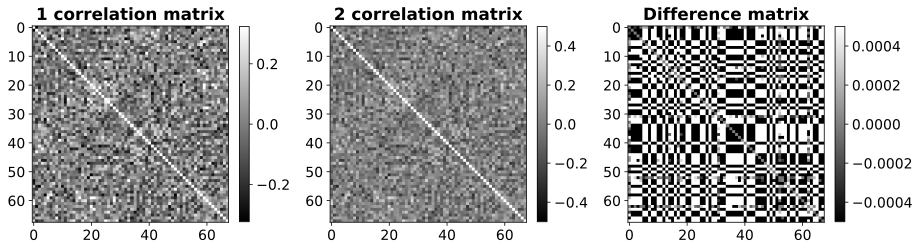

In [9]:
corrMat2 = np.corrcoef(data.T)


fig,axs = plt.subplots(1,3,figsize=(13,6))
h1 = axs[0].imshow(corrMat,vmin=-clim,vmax=clim,cmap='gray')
axs[0].set_title('1 correlation matrix',fontweight='bold')

h2 = axs[1].imshow(corrMat2,vmin=-.5,vmax=.5,cmap='gray')
axs[1].set_title('2 correlation matrix',fontweight='bold')

h3 = axs[2].imshow(corrMat2-corrMat,vmin=-.0005,vmax=.0005,cmap='gray')
axs[2].set_title('Difference matrix',fontweight='bold')

fig.colorbar(h1,ax=axs[0],fraction=.045)
fig.colorbar(h2,ax=axs[1],fraction=.045)
fig.colorbar(h3,ax=axs[2],fraction=.045)

plt.tight_layout()
plt.show()

### 정답

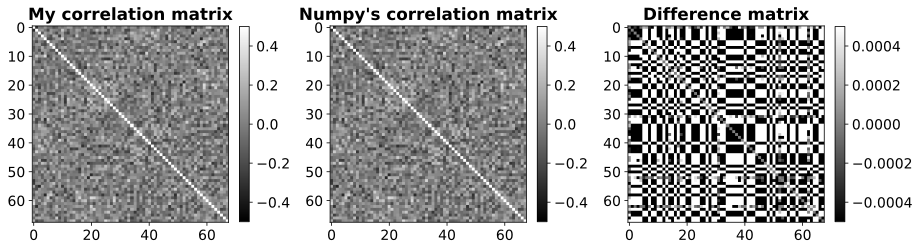

In [10]:
# Diagonal matrix of inverse standard deviations
variances = np.diag(covMat) # variances are the diagonals of a covariance
standard_devs = np.sqrt( variances )
S = np.diag( 1/standard_devs )


# compute the correlation matrix
corrMat = S @ covMat @ S


# numpy's correlation function (note transposing the matrix!)
corrMat_np = np.corrcoef(data.T)


# and show it
fig,axs = plt.subplots(1,3,figsize=(13,6))
h1 = axs[0].imshow(corrMat,vmin=-.5,vmax=.5,cmap='gray')
axs[0].set_title('My correlation matrix',fontweight='bold')

h2 = axs[1].imshow(corrMat_np,vmin=-.5,vmax=.5,cmap='gray')
axs[1].set_title("Numpy's correlation matrix",fontweight='bold')

h3 = axs[2].imshow(corrMat_np-corrMat,vmin=-.0005,vmax=.0005,cmap='gray')
axs[2].set_title('Difference matrix',fontweight='bold')

fig.colorbar(h1,ax=axs[0],fraction=.045)
fig.colorbar(h2,ax=axs[1],fraction=.045)
fig.colorbar(h3,ax=axs[2],fraction=.045)

plt.tight_layout()
plt.savefig('Figure_06_07.png',dpi=300)
plt.show()

### 6-3

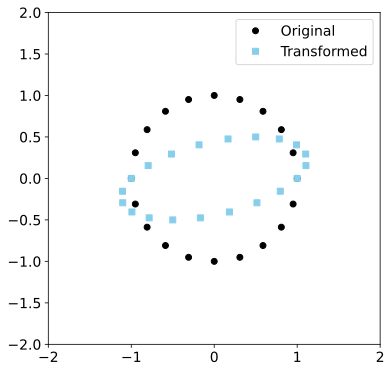

In [11]:
T = np.array([[1, 0.5],[0, 0.5]])
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
Points = np.vstack((np.sin(theta),np.cos(theta)))

transformedPoints = T @ Points #변환행렬 적용


plt.figure(figsize=(6,6))
plt.plot(Points[0,:],Points[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s',
         color='skyblue',label='Transformed')

plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.show()

### 6-7

(1675, 3000, 3)


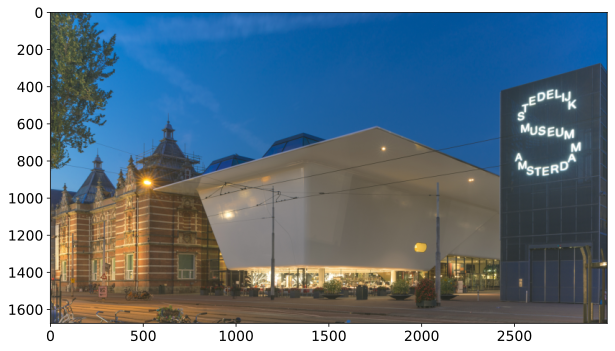

(1675, 3000)


In [12]:
# read a pic from the web
bathtub = io.imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')

# check the size
print(bathtub.shape)

# let's see what the famous Bathtub Museum looks like
fig = plt.figure(figsize=(10,6))
plt.imshow(bathtub)
plt.savefig('Figure_06_05a.png',dpi=300)
plt.show()

# transform image to 2D for convenience (not necessary for convolution!)
bathtub2d = color.rgb2gray(bathtub)

# check the size again
print(bathtub2d.shape)

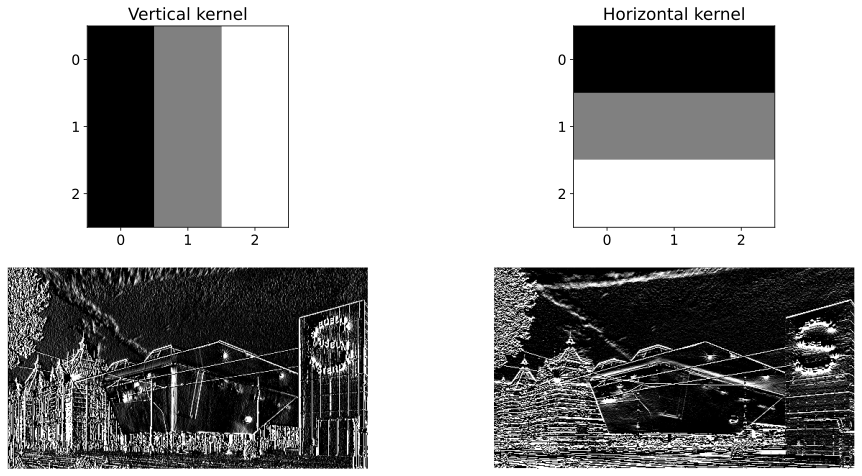

In [13]:
kernal_v = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) #수직커널
kernal_h = np.array([[-1,-1,-1],[0,0,0],[1,1,1]]) #수평커널

fig,ax = plt.subplots(2,2,figsize=(16,8))


ax[0,0].imshow(kernal_v,cmap='gray')
ax[0,0].set_title('Vertical kernel')
ax[0,0].set_yticks(range(3))

ax[0,1].imshow(kernal_h,cmap='gray')
ax[0,1].set_title('Horizontal kernel')
ax[0,1].set_yticks(range(3))

# run convolution and show the result
convres = convolve2d(bathtub2d,kernal_v,mode='same')
ax[1,0].imshow(convres,cmap='gray',vmin=0,vmax=.01)
ax[1,0].axis('off')

convres = convolve2d(bathtub2d,kernal_h,mode='same')
ax[1,1].imshow(convres,cmap='gray',vmin=0,vmax=.01)
ax[1,1].axis('off')

plt.show()

### 7-4

In [14]:
M = np.random.randint(-10,11,size = (4,40))
MMt = M@M.T
MMt_inv = np.linalg.inv(MMt)

R = M.T@MMt_inv           
print( np.round( M@R,6 )), print(' ')
print( np.round( R@M,6 ))

[[ 1.  0.  0. -0.]
 [-0.  1. -0. -0.]
 [ 0. -0.  1. -0.]
 [-0. -0.  0.  1.]]
 
[[ 0.05385   0.020833 -0.00271  ... -0.059471  0.021986 -0.01479 ]
 [ 0.020833  0.121751  0.0146   ... -0.034133  0.011079 -0.081287]
 [-0.00271   0.0146    0.181267 ...  0.020993 -0.095482 -0.058964]
 ...
 [-0.059471 -0.034133  0.020993 ...  0.096212 -0.008727  0.029266]
 [ 0.021986  0.011079 -0.095482 ... -0.008727  0.084199  0.028799]
 [-0.01479  -0.081287 -0.058964 ...  0.029266  0.028799  0.072235]]


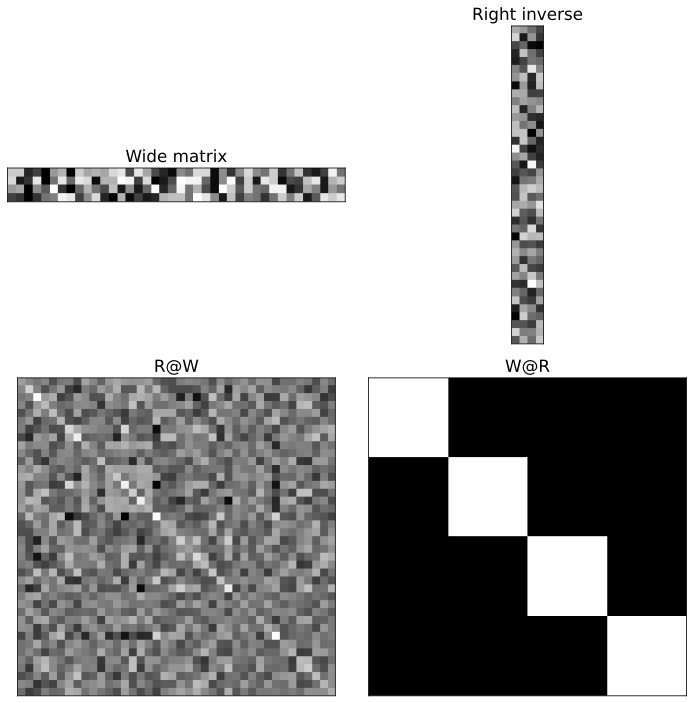

In [15]:
fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].imshow(M,cmap='gray')
axs[0,0].set_title('Wide matrix')

axs[0,1].imshow(R,cmap='gray')
axs[0,1].set_title('Right inverse')

axs[1,0].imshow(R@M,cmap='gray')
axs[1,0].set_title('R@W')

axs[1,1].imshow(M@R,cmap='gray')
axs[1,1].set_title('W@R')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])
  
plt.tight_layout()
plt.show()

### 7-5

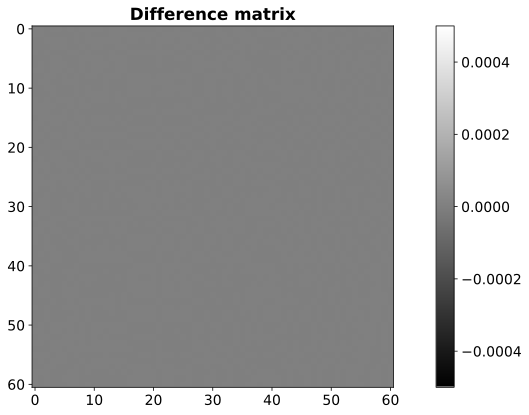

In [16]:
N = np.random.randint(1,100)
data = np.random.randn(N,N)


pinv = np.linalg.pinv(data)
inv = np.linalg.inv(data)

fig,axs = plt.subplots(figsize=(13,6))

h1 = axs.imshow(pinv - inv, vmin=-0.0005, vmax=0.0005, cmap='gray')
axs.set_title('Difference matrix',fontweight='bold')

fig.colorbar(h1,ax = axs,fraction=.045)

plt.tight_layout()
plt.show()

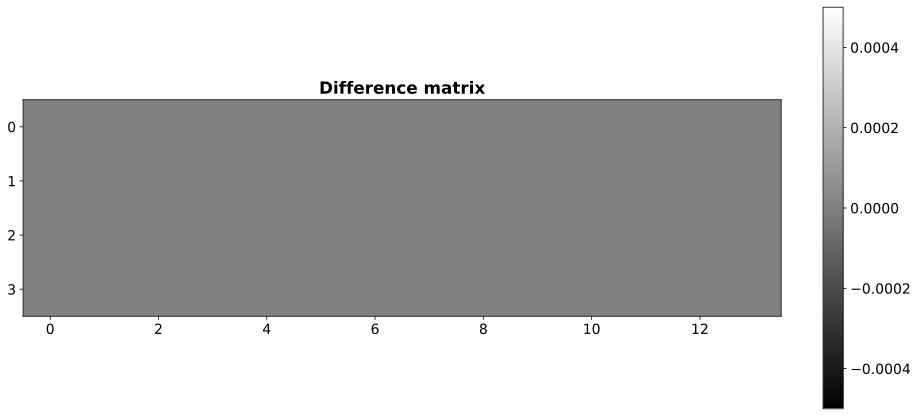

In [17]:
M,N = 14,4

A = np.random.randn(M,N)

ALeft = np.linalg.inv(A.T@A) @ A.T
Apinv = np.linalg.pinv(A)


fig,axs = plt.subplots(figsize=(13,6))

h1 = axs.imshow(Apinv - ALeft, vmin=-0.0005, vmax=0.0005, cmap='gray')
axs.set_title('Difference matrix',fontweight='bold')

fig.colorbar(h1,ax = axs,fraction=.045)

plt.tight_layout()
plt.show()

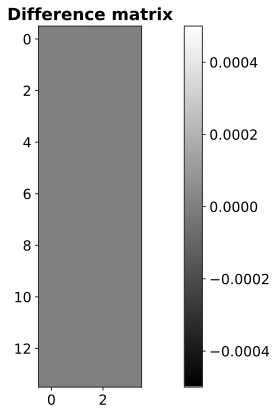

In [18]:
# right inverse case
M,N = 4,14

A = np.random.randn(M,N)

ARight = A.T @ np.linalg.inv(A@A.T)
Apinv  = np.linalg.pinv(A)

fig,axs = plt.subplots(figsize=(13,6))

h1 = axs.imshow(Apinv - ARight, vmin=-0.0005, vmax=0.0005, cmap='gray')
axs.set_title('Difference matrix',fontweight='bold')

fig.colorbar(h1,ax = axs,fraction=.045)

plt.tight_layout()
plt.show()

### 7-9

In [20]:
def hilbmat(k):
  H = np.zeros((k,k))
  for i in range(k):
    for j in range(k):
      H[i,j] = 1 / (i+j+1) #힐버트 행렬의 정의
  return H
print( hilbmat(5) ), print(' ')
from scipy.linalg import hilbert
print( hilbert(5) )

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
 
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


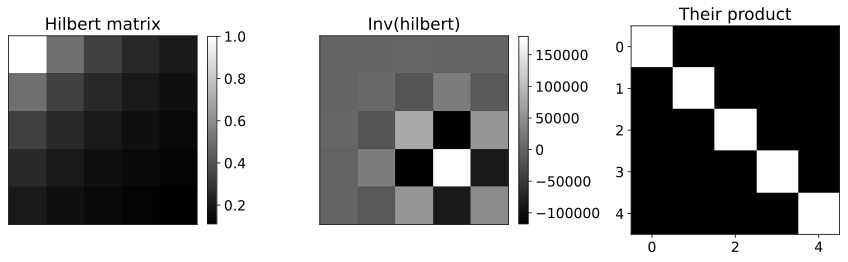

In [21]:
H = hilbmat(5)
Hi = np.linalg.inv(H)

fig,axs = plt.subplots(1,3,figsize=(12,6))
h = [0,0,0]

#힐버트 행렬
h[0] = axs[0].imshow(H,cmap='gray')
axs[0].set_title('Hilbert matrix')

#힐버트 행렬의 역행렬
h[1] = axs[1].imshow(Hi,cmap='gray')
axs[1].set_title('Inv(hilbert)')

# 힐버트 행렬과 역행렬의 곱 = 단위행렬
h[2] = axs[2].imshow(H@Hi,cmap='gray')
axs[2].set_title('Their product')


for i in range(2):
  fig.colorbar(h[i],ax=axs[i],fraction=.045)
  axs[i].set_xticks([])
  axs[i].set_yticks([])

plt.tight_layout()
plt.show()

### 7-10

In [22]:
N = np.random.randint(1,10)

H = hilbmat(N)
Hi = np.linalg.inv(H)

H_I = np.round(H@Hi,6)
I = np.eye(N)

print(np.sqrt(np.sum((H_I-I)**2)))

0.0


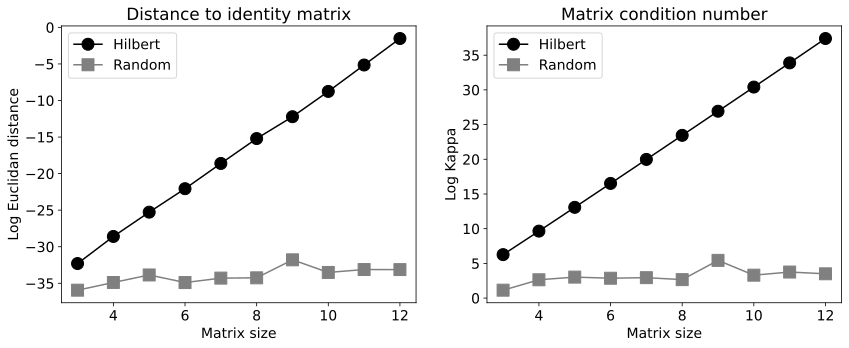

In [23]:
matSizes = np.arange(3,13) #3x3에서 12x12에 이르는 다양한 행렬 크기의 범위에 대해 수행되도록 한다.

identityError = np.zeros((len(matSizes),2)) #유클리드 거리
condNumbers   = np.zeros((len(matSizes),2)) #힐버트 행렬의 조건수


for i,k in enumerate(matSizes):
    
    ### 힐버트 행렬
    H   = hilbmat(k)       # the matrix
    Hi  = np.linalg.inv(H) # its inverse
    HHi = H@Hi             # 단위행렬일 것이다.
    err = HHi - np.eye(k)  # 오차
    identityError[i,0] = np.sqrt(np.sum(err**2))  # 오차로 유클리디안 거리를 저장해 유클리드 배열에 저장
    condNumbers[i,0] = np.linalg.cond(H) # 조건수 저장
    

    ### 난수 행렬
    H = np.random.randn(k,k) # the matrix
    Hi  = np.linalg.inv(H)   # its inverse
    HHi = H@Hi               # should be identity
    err = HHi - np.eye(k)    # difference from true identity
    identityError[i,1] = np.sqrt(np.sum(err**2))  # Euclidean distance
    condNumbers[i,1] = np.linalg.cond(H) # condition number
    


# now plot
fig,axs = plt.subplots(1,2,figsize=(14,5))

## plot the Euclidean distance to the identity matrix
h = axs[0].plot(matSizes,np.log(identityError),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[0].legend(['Hilbert','Random'])
axs[0].set_xlabel('Matrix size')
axs[0].set_ylabel('Log Euclidan distance')
axs[0].set_title('Distance to identity matrix') #단위행렬까지의 거리 -> 행렬의 크기가 커질수록 거리가 가까워진다.



## plot the condition numbers
h = axs[1].plot(matSizes,np.log(condNumbers),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[1].legend(['Hilbert','Random'])
axs[1].set_xlabel('Matrix size')
axs[1].set_ylabel('Log Kappa')
axs[1].set_title('Matrix condition number')

plt.show()